In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop
import scipy.ndimage as snd
import scipy.integrate as sint

In [2]:
def fn(x,n):
    return x**n/(1+x**n)


In [167]:
dfrpc = lambda x: (x>0)*2*x/(1+x**2)**2
dfrsst = lambda x: (x>0)*3*x**2
dfrvip = lambda x: (x>0)*3*x**2

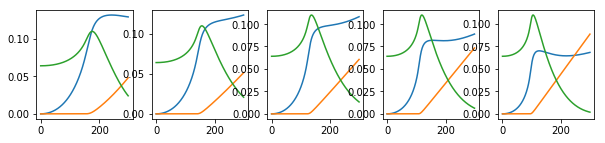

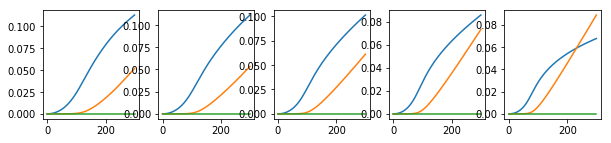

In [28]:
r0 = 1e-2*np.ones((6,))
inputs = np.linspace(0,0.4,300)
frpc = lambda x: (x>0)*fn(x,2)
frsst = lambda x: (x>0)*x**3
frvip = lambda x: (x>0)*x**3
# Wpp = 1.3
# Wps = 2.1
# Wsp = 3.3
# Wpv = 0
# Wvp = 1.4
# Wvs = 2.7
# Wsv = 1.3
Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
scaling_both = 1
scaling_Wvs = 1
Wvs = 2.1*scaling_both*scaling_Wvs
Wsv = 1.3*scaling_both
mods = np.array((0.4,)) #np.array((0.2,0.25,0.3,0.35,0.4))-0.1 #,0.45,0.5,0.55,0.6)
horiz = np.linspace(0,1,5)
rinf = np.zeros((len(horiz),len(mods),6)+inputs.shape)
plt.figure(figsize=((2*len(horiz),2*len(mods))))
hcoupling = 1.0
for i_horiz,inp_horiz in enumerate(horiz):
    for i_mod,inp_vip in enumerate(mods):
        W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
        W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)
        def frtotal(x):
            rpc = frpc(x[0])[np.newaxis]
            rsst = frsst(x[1])[np.newaxis]
            rvip = frvip(x[2])[np.newaxis]
            return np.concatenate((rpc,rsst,rvip),axis=0)
        def dfrtotal(x):
            rpc = dfrpc(x[0])[np.newaxis]
            rsst = dfrsst(x[1])[np.newaxis]
            rvip = dfrvip(x[2])[np.newaxis]
            return np.concatenate((rpc,rsst,rvip),axis=0)
        def frtotal_big(x):
            return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
        def rdot(r,inp):
            return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
        for i,inp in enumerate(inputs):
            fn_to_lsq = lambda x: rdot(x,inp)
            if i_horiz > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz-1,i_mod][:,i])['x']
            elif i > 0:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz,i_mod][:,i-1])['x']
            else:
                rinf[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,r0)['x']
        plt.subplot(1,len(horiz),i_horiz*len(mods)+i_mod+1)
        plt.plot(rinf[i_horiz,i_mod][:3].T) #/rinf.max(1)[:,np.newaxis]).T)
#         plt.axis('off')

Wsv = 0
rinf_halo = np.zeros((len(horiz),len(mods),6)+inputs.shape)
plt.figure(figsize=((2*len(horiz),2*len(mods))))
hcoupling = 1.0

W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

def frtotal(x):
    rpc = frpc(x[0])[np.newaxis]
    rsst = frsst(x[1])[np.newaxis]
    rvip = frvip(x[2])[np.newaxis]
    return np.concatenate((rpc,rsst,rvip),axis=0)
def frtotal_big(x):
    return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
def rdot(r,inp):
    return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))

for i_horiz,inp_horiz in enumerate(horiz):
    for i_mod,inp_vip in enumerate(mods):
        for i,inp in enumerate(inputs):
            fn_to_lsq = lambda x: rdot(x,inp)
            if i_horiz > 0:
                rinf_halo[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz-1,i_mod][:,i])['x']
            elif i > 0:
                rinf_halo[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,rinf[i_horiz,i_mod][:,i-1])['x']
            else:
                rinf_halo[i_horiz,i_mod][:,i] = sop.least_squares(fn_to_lsq,r0)['x']
        plt.subplot(1,len(horiz),i_horiz*len(mods)+i_mod+1)
        plt.plot((rinf_halo[i_horiz,i_mod][:3]*(np.array((1,1,0))[:,np.newaxis])).T) #/rinf.max(1)[:,np.newaxis]).T)
#         plt.axis('off')

In [188]:
inp = 0.4
inp_vip = 0.5
inp_horiz = 0


hcoupling = 1

Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
Wvs = 2.1
Wsv = 1.3

nsteps = 100

roots = [None]*nsteps
stability = [None]*nsteps

#Wvps = np.linspace(0.2,1.3,nsteps)
Wvss = (2.1,) #np.linspace(1.5,3,nsteps)

for iWvp, Wvs in enumerate(Wvss):

    W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
    def dfrtotal(x):
        rpc = dfrpc(x[0])[np.newaxis]
        rsst = dfrsst(x[1])[np.newaxis]
        rvip = dfrvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def dfrtotal_big(x):
        return np.concatenate((dfrtotal(x[:3]),dfrtotal(x[3:])),axis=0)
    def drdot(r,inp):
        return -np.identity(6) + dfrtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))[:,np.newaxis]*W_big
    
    to_root = lambda x: rdot(x,inp)
    jac = lambda x: drdot(x,inp)
    
    Ntries = 100
    if iWvp==0:
        solns = np.zeros((Ntries,6))
        for i in range(Ntries): 
            rt = sop.root(to_root,0.2*np.random.rand(6))
            if rt['success']:
                solns[i] = rt['x']
            else:
                solns[i] = np.nan
    else:
        nprev = roots[iWvp-1].shape[0]
        solns = np.zeros((Ntries*nprev,6))
        is_stable = np.zeros((Ntries*nprev,6),dtype=np.complex64)
        for isoln in range(nprev):
            for i in range(Ntries): 
                rt = sop.root(to_root,roots[iWvp-1][isoln] + 0.1*np.random.randn(6),jac=jac)
                if rt['success']:
                    solns[Ntries*isoln + i] = rt['x']
                    J = rt['fjac']
                    is_stable[Ntries*isoln + i] = np.linalg.eig(J)[0] #np.sum(np.real(np.linalg.eig(J)[0])<=0)
                else:
                    solns[Ntries*isoln + i] = np.nan
                    is_stable[Ntries*isoln + i] = np.nan

    roots[iWvp],uinds = np.unique(np.around(solns[np.logical_not(np.isnan(solns[:,0]))],decimals=3),axis=0,return_index=True)
    stability[iWvp] = is_stable[uinds]

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


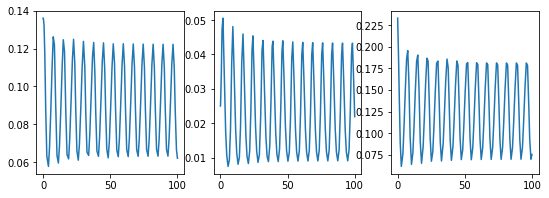

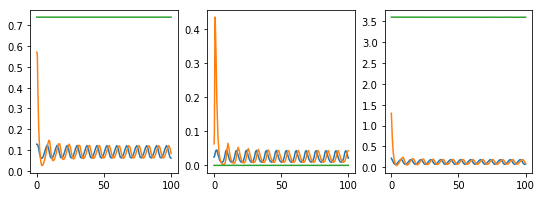

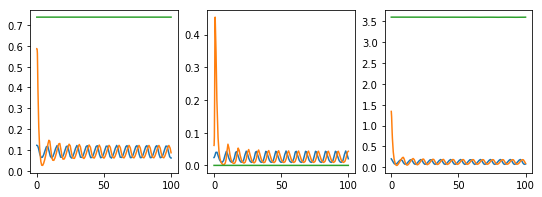

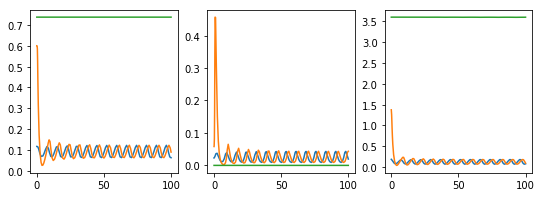

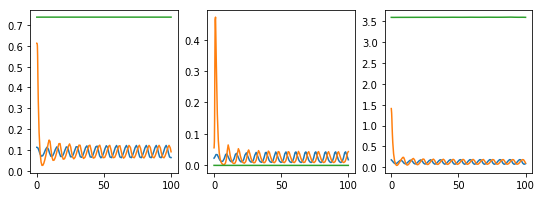

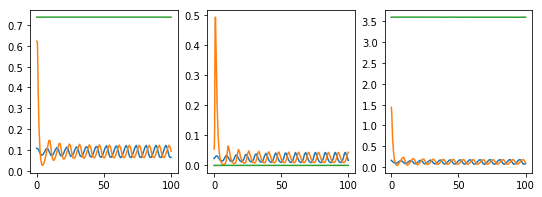

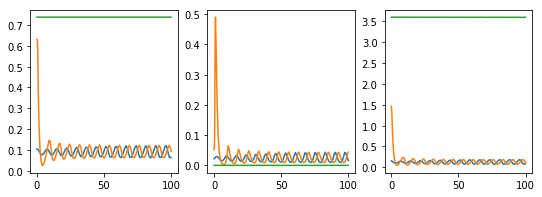

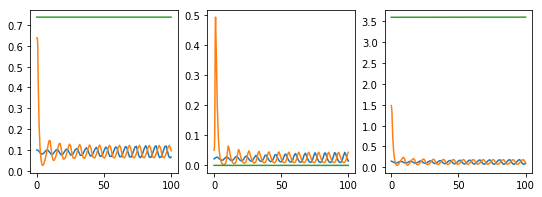

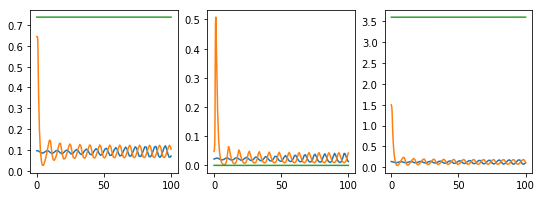

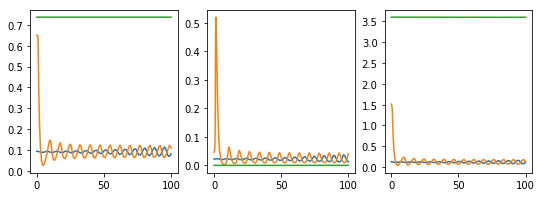

In [26]:
evol_fn = lambda t,x: to_root(x)

for val in range(10):
    plt.figure(figsize=(9,3))
    nsoln = roots[5*val].shape[0]
    for isoln in range(nsoln):
        r0 = roots[10*val][isoln]
        T = int(1e4)
        rdyn = np.zeros((T,6))
        result = sint.solve_ivp(evol_fn,(0,100),r0+1e-4*np.random.randn(6))
        for idx in range(3):
            plt.subplot(1,3,idx+1)
            plt.plot(result['t'],result['y'][idx])

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


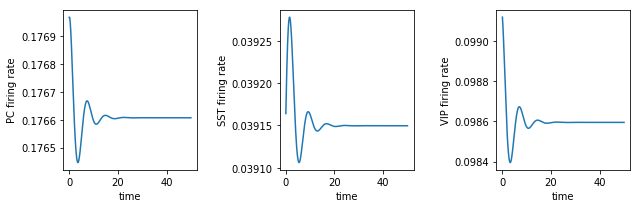

In [189]:
    evol_fn = lambda t,x: to_root(x)
    plt.figure(figsize=(9,3))
    nsoln = roots[0].shape[0]
    for isoln in range(1):
        r0 = roots[0][isoln]
        T = int(1e4)
        rdyn = np.zeros((T,6))
        result = sint.solve_ivp(evol_fn,(0,50),r0 + 1e-4*np.random.randn(6),max_step=0.1)
        for idx in range(3):
            plt.subplot(1,3,idx+1)
            plt.plot(result['t'],result['y'][idx])
    lbls = ['PC','SST','VIP']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.xlabel('time')
        plt.ylabel(lbls[i] + ' firing rate')
    plt.tight_layout()
#     plt.savefig('temporal_evolution_one_subnetwork_driven.pdf')
#     plt.savefig('temporal_evolution_one_subnetwork_driven.png')

In [191]:
# rt = sop.root(to_root,result['y'][:,-1])
J = rt['fjac']
s,v = np.linalg.eig(jac(r0))
eps = 1e-2

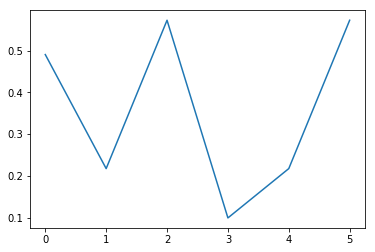

In [197]:
plt.figure()
plt.plot(np.abs(v[:,0]))

In [183]:
J

array([[-0.11802028,  0.64799767,  0.26634611,  0.06624767,  0.64799767,
         0.26634611],
       [-0.70333944, -0.30883506, -0.3249492 ,  0.02976346,  0.44481986,
        -0.32494921],
       [-0.07046081,  0.09077233, -0.71630693,  0.15636924, -0.09772137,
         0.66309821],
       [-0.41451829, -0.30168609,  0.52442506,  0.49451067, -0.21093297,
         0.4160588 ],
       [ 0.47091858, -0.61330464,  0.05264357, -0.03106873,  0.56492971,
         0.28144435],
       [ 0.30468081,  0.09655688, -0.18049698,  0.85133306,  0.09511337,
        -0.36256404]])

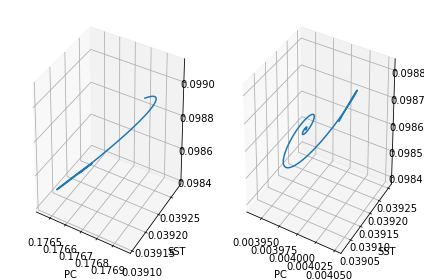

In [198]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot(result['y'][0],result['y'][1],result['y'][2])
plt.xlabel('PC')
plt.ylabel('SST')
plt.tight_layout()
# plt.zlabel('VIP')
ax = fig.add_subplot(122, projection='3d')
ax.plot(result['y'][3],result['y'][4],result['y'][5])
plt.xlabel('PC')
plt.ylabel('SST')
plt.tight_layout()

In [163]:


eps = 1e-4

rt2 = sop.root(to_root,result['y'][:,-1] + eps*np.real(v[:,0] + v[:,1]))
J2 = rt2['fjac']
s2,v2 = np.linalg.eig(J2)

In [164]:
v[:,0] + v[:,1]

array([ 0.10898502+0.j,  1.1257984 +0.j, -0.25835244+0.j,  0.03408132+0.j,
        0.74648715+0.j, -0.30911105+0.j])

In [165]:
perturbation = eps*np.real(v[:,0] + v[:,1])
to_root(r0)
(to_root(r0 + perturbation)- to_root(r0))/perturbation

array([-16.3651518 ,  -0.62740347,   8.52598107, -10.90851827,
        -0.43807662,   6.96173556])

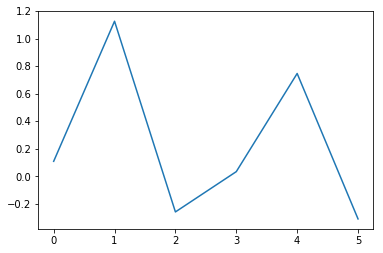

In [166]:
plt.figure()
plt.plot(np.real(v[:,0] + v[:,1]))